<h2>What is Chat-GPT?</h2>

With the recent release of Chat GPT-4, many people are enthralled by the programs capabilities, and many are also expressing concerns regarding the implications that come with releasing a powerful AI open to use to anyone and everyone who desire it. What exactly is Chat-GPT? Chat GPT is an Artificial Intelligence chat bot developed and released by OpenAI, a research team of scientists and engineers working to further develop the capabilities of artificial intelligence. According to OpenAI Chat-GPT is powered by a deep learning model, which is a type of neural network designed to process and generate language. GPT learns by being fed large amounts of data and text which it processes and ‘learns’ to discuss and generate answers about that data in the same context in which it took in that data. 

<h2>Why is it important to discuss?</h2>

The advancement of powerful natural language processing technology has come rapidly, opening up possibilities for its users and empowering people to do more with their computers. Chat-GPT 4 has been used to aid education, programming work, day-to-day inquiries, and can even be used for data analysis. Recently, the AI powering Chat GPT-4 has been used to code entire programs, and even create falsified videos and audio files. While the capabilities of the new AI are certainly incredible, its release to the public in the form of a chat-bot has also caused concern amongst many. Some concerns include its unlimited access to information that can out match a human counterpart easily, and scifi-like concerns about its ability to become more powerful than humans and overpower us. While AI sounds like something that is bound to a computer screen, many governments, such as Germany, have started drafting legislation in response to the development of AI’s such as Chat-GPT 4. Powerful AIs, such as Chat-GPT are here and how it is perceived and used everyday will dictate how we move forward with the new technology. 


<h2>Purpose</h2>

The Purpose of this tutorial is to analyze the sentiments surrounding recent advancements in AI technology and determine the general attitude towards AI technology, such as Chat-GPT. Understanding this sentiment is crucial in guiding our future course of action for the development and release of subsequent AI tools, as well as the formulations of relevant policies that aim to mitigate potential risks associated with AI


<h2>Data Collection</h2>

With Chat-GPT arguably being one of the most popular and most discussed releases of AI software in recent history we decided to center our data collection around tweets from the popular social media platform Twitter. Specifically, we focused on tweets containing the hashtag '#ChatGPT' starting from the initial launch of the OpenAI chatbot in November 2022 until April 7th, 2023. Our analysis revolves around the tweet's contents, the number of likes it received, and the number of retweets it accumulated. By assessing the overall sentiment of each tweet as either positive or negative, we aim to determine the general perception of Twitter users regarding Chat-GPT.

<h2>Imports</h2>

In [1]:
#Add imports
#%pip install textblob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob as tb

In [ ]:
#read tweets into dataframe
df = pd.read_csv("ChatGPT.csv",low_memory=False)

print("contains " + str(df.count()) + " records")

#df.head()

#remove unneccessary columns (subject to change)
#df.drop(columns=['Unnamed: 0', 'Location', 'Description'], axis=1, inplace=True)

In [ ]:
#remove time information from date column
df['Date'] = df['Date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
df['Date'] = pd.to_datetime(df['Date'])

#df.head()

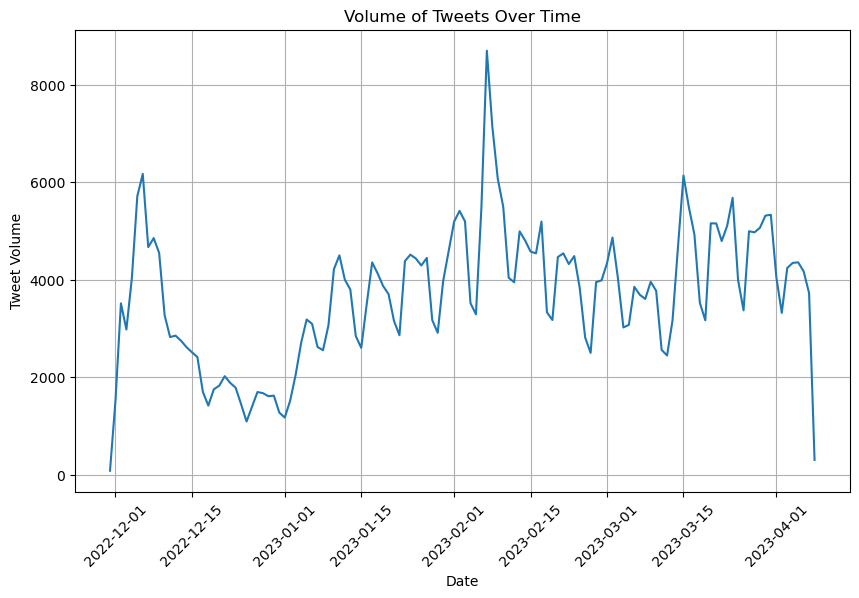

In [5]:
# Group by date and count the tweets
tweets_by_date = df.groupby('Date')['Tweet'].count()

# Create a line chart of the volume of tweets over time
plt.figure(figsize=(10, 6))
plt.plot(tweets_by_date.index, tweets_by_date)
plt.xlabel("Date")
plt.ylabel("Tweet Volume")
plt.title("Volume of Tweets Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [6]:
#create fucntion using textblob to gauge attitudes
def get_attitudes(tweet):
    result = tb(tweet)
    attitude = result.sentiment.polarity
    return attitude

In [ ]:
#get the attitude score for each tweet
df['Tweet'] = df['Tweet'].astype(str)
df['Attitudes'] = df['Tweet'].apply(get_attitudes)
df.head(50)

In [14]:
#Group attitudes into positive, negative, and neutral based on 
def classify_attitude(attitude):
    if attitude < 0:
        return 'Negative'
    elif attitude > 0:
        return 'Positive'
    else:
        return 'Neutral'

In [15]:
df['AttitudeClass'] = df['Attitudes'].apply(classify_attitude)


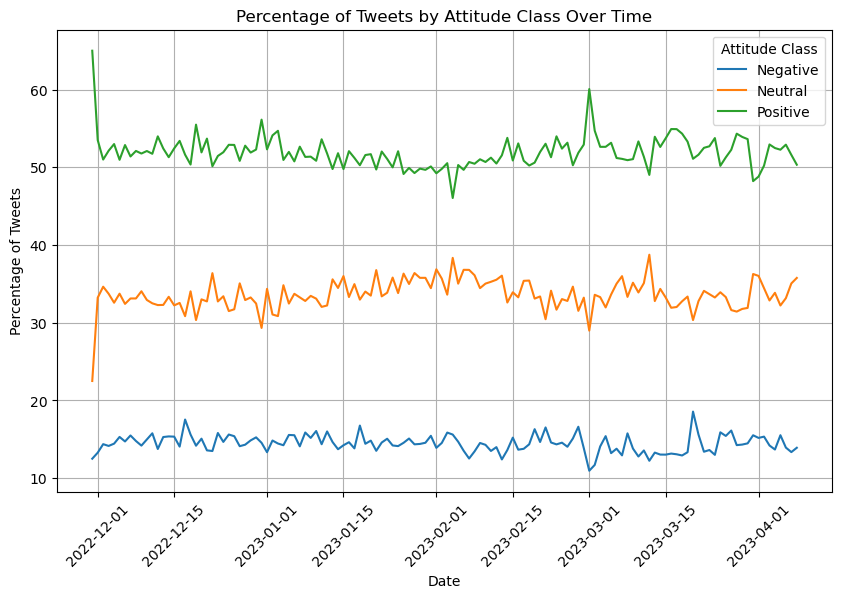

In [17]:
# Group by date and attitude class, then count the tweets
tweets_by_date_attitude = df.groupby(['Date', 'AttitudeClass'])['Tweet'].count().unstack()

# Calculate the total number of tweets per day
daily_total_tweets = tweets_by_date_attitude.sum(axis=1)

# Calculate the percentage of tweets for each attitude class
tweets_percentage_by_date_attitude = tweets_by_date_attitude.div(daily_total_tweets, axis=0) * 100

# Create a line chart of the percentage of tweets by attitude class over time
plt.figure(figsize=(10, 6))
plt.plot(tweets_percentage_by_date_attitude)
plt.xlabel("Date")
plt.ylabel("Percentage of Tweets")
plt.title("Percentage of Tweets by Attitude Class Over Time")
plt.xticks(rotation=45)

plt.legend(['Negative', 'Neutral', 'Positive'], title='Attitude Class')
plt.grid()
plt.show()

In [ ]:
# Define weights to likes and retweets
like_weight = 0.5
rt_weight = 0.2

#calculated weighted scores
weighted_scores = pd.DataFrame()
weighted_scores['weighted_likes'] = df['Likes'] * like_weight
weighted_scores['weighted_rt'] = df['rt'] * rt_weight

#get overall popularity score
df['Popularity'] = weighted_scores['weighted_likes'] + weighted_scores['weighted_rt']

# Calculate the weighted score by multiplying the attitude score with the popularity score



In [ ]:
# Create a line chart of the volume of tweets by attitude over time

tweets_by_date_attitude = df.groupby(['Date', 'Attitudes'])['Tweet'].count().unstack()

plt.figure(figsize=(10, 6))
plt.plot(tweets_by_date_attitude)
plt.xlabel("Date")
plt.ylabel("Tweet Volume")
plt.title("Volume of Tweets by Attitude Over Time")
plt.xticks(rotation=45)

plt.legend(['Negative', 'Positive'], title='Attitude')
plt.grid()
plt.show()


In [22]:
# Group by attitude class and examine statistics about follower counts for users who post about chatGPT
average_followers_by_attitude = df.groupby('AttitudeClass')['UserFollowers'].describe()

print(average_followers_by_attitude)

                  count          mean            std  min   25%    50%  \
AttitudeClass                                                            
Negative        68922.0  23102.582020  373163.546972  0.0  72.0  440.0   
Neutral        161627.0  21098.108286  350241.354486  0.0  70.0  423.0   
Positive       247717.0  18316.401325  287127.358907  0.0  79.0  454.0   

                  75%         max  
AttitudeClass                      
Negative       1998.0  17739517.0  
Neutral        2175.0  17739587.0  
Positive       2199.0  17739587.0  


In [23]:
# Group by attitude class and count unique users
unique_users_by_attitude = df.groupby('AttitudeClass')['User'].nunique()

print(unique_users_by_attitude)

AttitudeClass
Negative     45327
Neutral      86484
Positive    122814
Name: User, dtype: int64
